In [71]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame 


In [38]:
data_df = pd.read_sql('SELECT station.station, name, latitude, longitude, elevation, date, prcp, tobs FROM measurement JOIN station on measurement.station = station.station ORDER BY date desc',connection)
data_df.head()

,station,name,latitude,longitude,elevation,date,prcp,tobs
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2017-08-23,0.00,81.0
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2017-08-23,0.00,82.0
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-23,0.08,82.0
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2017-08-23,0.45,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2017-08-22,0.00,82.0


In [39]:
sel = [func.max(Measurement.date)]
test = session.query(*sel).all()
test[0]

('2017-08-23')

In [40]:
#set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Design a query to retrieve the last 12 months of precipitation data and plot the results
query_date = dt.date(2017, 8, 23) - dt.timedelta(12*366/12)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>query_date).all()
prcp_df = pd.DataFrame(results, columns = ['date','precipitation'])
prcp_df2 = prcp_df.set_index('date').sort_values('date', ascending=True)

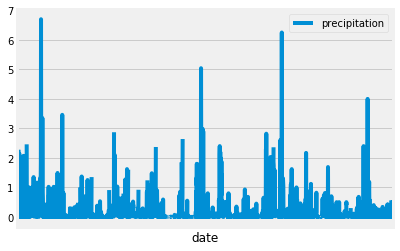

In [14]:
prcp_df2.plot()
plt.xticks([],[])
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df2.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
len(data_df['station'].value_counts())

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
data_df['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
data_df.loc[data_df["station"] == "USC00519281"]['tobs'].max()

85.0

In [19]:
data_df.loc[data_df["station"] == "USC00519281"]['tobs'].min()

54.0

In [20]:
data_df.loc[data_df["station"] == "USC00519281"]['tobs'].mean()

71.66378066378067

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_data = data_df.loc[(data_df["station"] == "USC00519281") & (data_df["date"] > "2016-08-23")]
hist_data.head()

,station,name,latitude,longitude,elevation,date,prcp,tobs
20,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2017-08-18,0.06,79.0
24,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2017-08-17,0.01,76.0
28,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2017-08-16,0.12,76.0
33,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2017-08-15,0.32,77.0
38,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2017-08-14,0.00,77.0


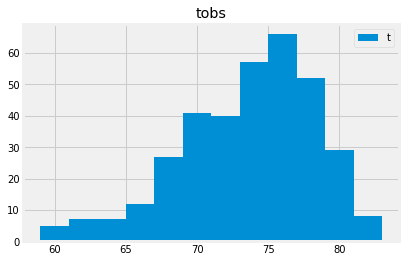

In [22]:
hist_data.hist(column='tobs',bins=12)
plt.legend('tobs')

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


def calc_temps(start_date, end_date):
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin=calc_temps('2011-02-28', '2011-03-05')[0][0]
tavg=calc_temps('2011-02-28', '2011-03-05')[0][1]
tmax=calc_temps('2011-02-28', '2011-03-05')[0][2]

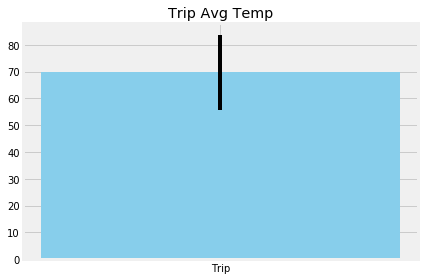

In [49]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar('Trip', tavg, color="skyblue", align="center", yerr=tmax-tmin)
plt.title('Trip Avg Temp')
plt.tight_layout()

In [54]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rain_fall(start_date, end_date):
    
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    sel = [Measurement.station,
           Station.name,
           Station.latitude,
           Station.longitude,
           Station.elevation,
           func.sum(Measurement.prcp)]

    return session.query(*sel).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        group_by(Measurement.station).\
        order_by(Measurement.prcp).all()

# function usage example
rain_fall_results = rain_fall('2011-02-28', '2011-03-05')
rain_fall_df = pd.DataFrame(rain_fall_results,columns = ['station','name','lat','long','elevation','sum_prcp']).sort_values('sum_prcp', ascending=False)
rain_fall_df

,station,name,lat,long,elevation,sum_prcp
2,USC00518838,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,20.97
6,USC00519281,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,20.07
8,USC00519523,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,19.71
0,USC00514830,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,17.64
5,USC00516128,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,13.05
4,USC00513117,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,12.96
7,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,12.42
3,USC00511918,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5.67
1,USC00517948,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,NaN


## Optional Challenge Assignment

In [91]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.strftime('%m-%d',Measurement.date), func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[('01-01', 62.0, 69.15384615384616, 77.0)]

In [92]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
daily_normals_results = []

# Set the start and end date of the trip
start_date = '2011-02-28'
end_date = '2011-03-05'
# Use the start and end date to create a range of dates
start_dt = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_dt = dt.datetime.strptime(end_date, '%Y-%m-%d') 
#start_dt  - dt.timedelta(days=1)

trip_dates = pd.date_range(start = start_date,  
         end = end_date, freq ='D')
trip_m_d = trip_dates.strftime('%m-%d')



# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
for x in trip_m_d:
    result = daily_normals(x)
    daily_normals_results.append(result[0])
daily_normals_results


[('02-28', 65.0, 70.65517241379311, 80.0),
 ('03-01', 64.0, 70.0327868852459, 76.0),
 ('03-02', 61.0, 70.36666666666666, 78.0),
 ('03-03', 60.0, 70.06896551724138, 78.0),
 ('03-04', 57.0, 69.27272727272727, 77.0),
 ('03-05', 60.0, 67.89090909090909, 76.0)]

In [93]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates_df = pd.DataFrame(daily_normals_results, columns = ['date','min_temp','avg_tamp','max_temp']).set_index('date')
trip_dates_df

,min_temp,avg_tamp,max_temp
date,,,
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


Text(0.5, 1.0, 'Daily Temps')

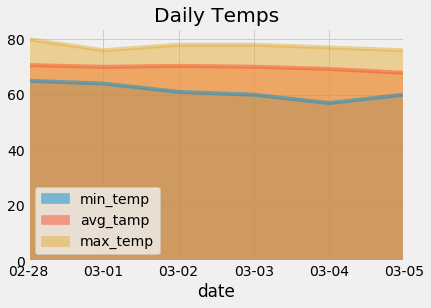

In [95]:
# Plot the daily normals as an area plot with `stacked=False`
trip_dates_df.plot.area(stacked=False)
plt.title('Daily Temps')